### Question 1: What categories of passengers were most likely to survive the Titanic disaster?
   

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import seaborn as sns
from pylab import *
import matplotlib.pyplot as pt
%matplotlib inline

In [2]:
train_data= pd.read_csv("train.csv")
train_data.describe()
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Survival Based On Gender

      Sex  Survived
0  female  0.742038
1    male  0.188908


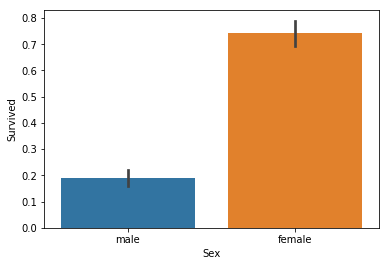

In [3]:
print(train_data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False))
sns.barplot(x="Sex", y="Survived",data=train_data)

### Survival based On Pclass

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


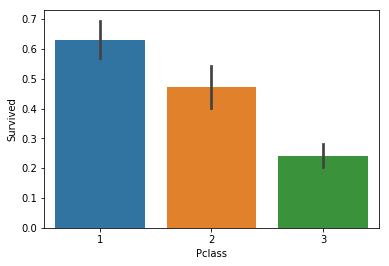

In [4]:
print(train_data[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False))
sns.barplot(x="Pclass", y="Survived",data=train_data)

### Survival based on Age

Text(0,0.5,'Persons')

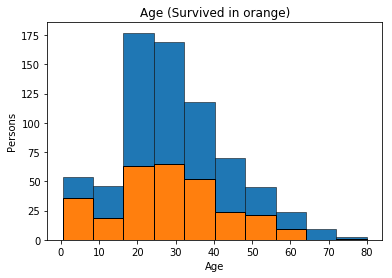

In [5]:
plt.title("Age (Survived in orange)")
train_data['Age'].plot.hist(edgecolor='black' , linewidth=0.5)
train_data[train_data.Survived == 1]['Age'].plot.hist(edgecolor='black', linewidth=1.0)
plt.xlabel("Age")
plt.ylabel("Persons")

### Survival Based on Embarked

          Survived
Embarked          
C         0.553571
Q         0.389610
S         0.336957


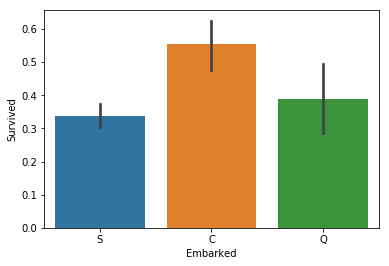

In [6]:
print(train_data[['Embarked', 'Survived']].groupby(['Embarked']).mean())
sns.barplot(x="Embarked", y="Survived", data=train_data)

### Survival based On Siblings or Spouse

   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


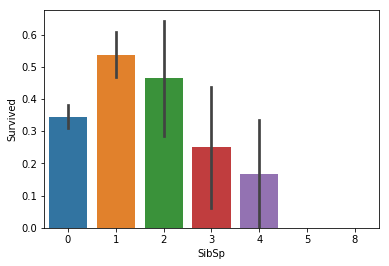

In [7]:
print(train_data[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False))

sns.barplot(x="SibSp", y="Survived", data=train_data)

### Survival based On Siblings or Spouse

   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000


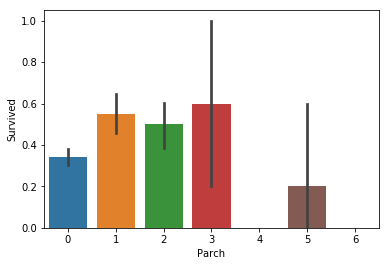

In [8]:
print(train_data[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False))
sns.barplot(x="Parch", y="Survived", data=train_data)


### Survival based on Fare

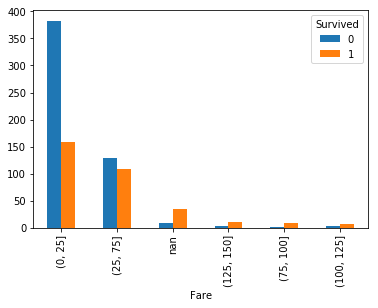

In [9]:
group = pd.cut(train_data.Fare, [0,25,75,100,125,150,175])
#print(group)
piv_fare = train_data.pivot_table(index=group, columns='Survived', values = 'Fare', aggfunc='count')
#group = pd.cut(train_data.Survived, [0,50,100,150,200,250,300,350,400,450])
#piv_fare = train_data.pivot_table(index=group, columns='Fare', values = 'Survived', aggfunc='count')
piv_fare.plot(kind='bar')




Conclusion:
<list>
1. Women had higher chance of survival than men
2. In passenger class '1' were most likely survived, 
3. The children lesser than 17 years  had the higher chance of survival.
4. The passengers who travelled with a family of 2 or 3 members were most likely to survive compared      to passengers who travelled alone or with more than family members . 
5. Higher fare paying passengers had better survival.
6. The first class passenger embarked from Cherbourg port had the higher survival rate compared to the    other paggengers who embarked from other ports.
   
   
   In short,a female who paid for a Pclass 1 ticket and embarked at Port C with one to three family       members aboard and is less than 17 years of age is more likely to survive.


<H5> Question:2 What other attributes did you use for the analysis?Explain how you used them.Provide a complete list of all attributes	used.

In [10]:
train_data.columns
train_data.shape
train_data.info()
#train_data.datatypes
# train_data.columns.values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Question 4: Treating missing Values

In [11]:
# Finding the percentage of missing values in each feature.

#toal number of passengers
total_Passengers=train_data.PassengerId.count()

#Age
Null_Age=pd.isnull(train_data.Age).sum() # Number of missing Values in Age 
percent_missing_age=np.divide(Null_Age,total_Passengers)*100
print('Percentage of missing Age values', percent_missing_age)

# Cabin 
Null_cabinvalues=pd.isnull(train_data.Cabin).sum() # Number of missing Values in cabin
percent_missing_cabin=np.divide(Null_cabinvalues,total_Passengers)*100
print ('Percentage of missing cabin values', percent_missing_cabin)


# Embarked
Null_embarkedvalues=pd.isnull(train_data.Embarked).sum()
percent_missing_embarked=np.divide(Null_embarkedvalues,total_Passengers)*100
print ('Percentage of missing Embarked values', percent_missing_embarked)


total = train_data.isnull().sum().sort_values(ascending=False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)



Percentage of missing Age values 19.865319865319865
Percentage of missing cabin values 77.10437710437711
Percentage of missing Embarked values 0.22446689113355783
             Total   Percent
Cabin          687  0.771044
Age            177  0.198653
Embarked         2  0.002245
Fare             0  0.000000
Ticket           0  0.000000
Parch            0  0.000000
SibSp            0  0.000000
Sex              0  0.000000
Name             0  0.000000
Pclass           0  0.000000
Survived         0  0.000000
PassengerId      0  0.000000


<list>
1. The Age feature is missing approximately 19.9% of its values.I guess it is important for the survival so the missing data should be filled up .
2. The Cabin feature is missing approximately 77% of its Values.It would be hard to fill in the missing data so it may be dropped
3. The Embarked feature is missing 0.22% of its values.So its highly unlikely to affect the outcome of the result.

In [12]:
#replacing the missing values in the feature 'Age' with median of the Values in the Age
train_data["Age"]=train_data["Age"].fillna(train_data["Age"].dropna().median())
#train_data.info()


In [13]:
#Now we need to fill in the missing values in the some features
#train_df['Embarked'].describe()


southampton = train_data[train_data["Embarked"] == "S"].shape[0]
print("Number of people embarking in Southampton (S):",southampton)

cherbourg = train_data[train_data["Embarked"] == "C"].shape[0]
print("Number of people embarking in Cherbourg (C):",cherbourg)

queenstown = train_data[train_data["Embarked"] == "Q"].shape[0]
print("Number of people embarking in Queenstown (Q):",queenstown)


Number of people embarking in Southampton (S): 644
Number of people embarking in Cherbourg (C): 168
Number of people embarking in Queenstown (Q): 77


Since the number of passengers boarded from Southhampton is more than other two ports,the missing values in Embarked is assigned'S' by default

In [14]:
#replacing the missing values in the Embarked feature with S
train_data = train_data.fillna({"Embarked": "S"})

In [15]:
train_data.isnull().sum().sort_values(ascending=False)

Cabin          687
Embarked         0
Fare             0
Ticket           0
Parch            0
SibSp            0
Age              0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

Cabin feature may be dropped as it is missing lot values and it is very difficult to fill in those missing values

<H6>Question 3: Did you engineer any attributes?If yes,explain the rationale and how the new attributes were used in the analysis?
  If you have excluded	any attributes from the	analysis,provide an explanation	why you	believe	they have to be	excluded

#### Creating new features  
   <list>
   1. 'Family' based on Parch and SibSp to get total count of family members on board.
   2. 'Title' to extracts title  from  the Name feature.Titles reflect social economic status and may be useful in predicting survival chance probability.
   3. 'Agegroup' which turns a continous numerical feature into an ordinal categorical feature.
   4.  The Two new features 'IsAlone'(if 'Family'=0) and 'BigFamily' (if Family>=4). 

In [16]:
# Adding a new column called Title

train_data['Title'] = train_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
#train_data['Title']
pd.crosstab(train_data['Title'], train_data['Sex'])
#train_data.info()


Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.285714
5   Royal  1.000000


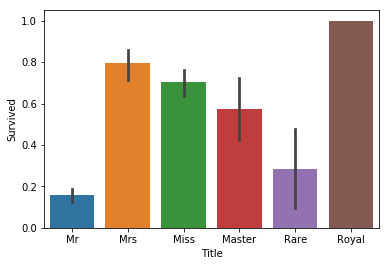

In [17]:
# replacing certain title names with rare, Mrs,Miss and royal
train_data['Title'] = train_data['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
train_data['Title'] = train_data['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
train_data['Title'] = train_data['Title'].replace(['Mlle','Ms'], 'Miss')
train_data['Title'] = train_data['Title'].replace('Mme', 'Mrs')

#print(train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).count())
print(train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())
sns.barplot(x = "Title", y = "Survived", data = train_data)


 Now the feature 'Name' may be dropped as it no longer has any relevance for analysis of survival rate.

In [18]:
#train_data = train_data.drop(['Name'], axis=1)


In [19]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title'],
      dtype='object')

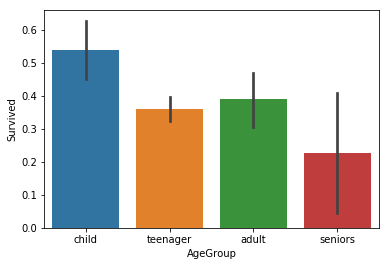

In [20]:
# Adding a new column called Agegruop
bins = [0, 17, 40, 60, np.inf]
labels = ['child', 'teenager', 'adult','seniors']
age_groups = pd.cut(train_data.Age, bins, labels = labels)
train_data['AgeGroup'] = age_groups
#train_data.info()

sns.barplot(x = "AgeGroup", y = "Survived", data = train_data)


 Now the feature 'Age' may be dropped as it no longer needed for the analysis.

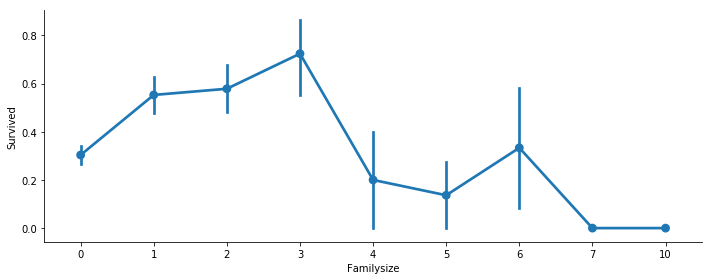

In [21]:
#Addding a new feature 'Family'

train_data['Familysize'] =train_data['SibSp'] + train_data['Parch']
train_data.loc[train_data['Familysize'] > 0, 'IsAlone'] = 0
train_data.loc[train_data['Familysize'] == 0, 'IsAlone'] = 1
train_data['IsAlone'] =train_data['IsAlone'].astype(int)
train_data['IsAlone'].value_counts()

axes = sns.factorplot('Familysize','Survived',data=train_data, aspect = 2.5, )
#axes = sns.factorplot('familsizey','Survived',data=train_data )

#train_data['alone'].head(10)


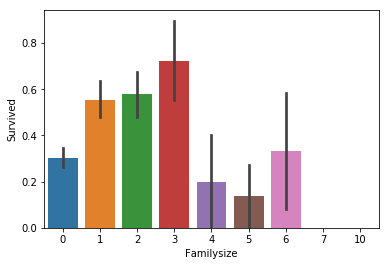

In [22]:
# Adding two new features: IsAlone (if Familysize=1) and BigFamily (if Familysize>=5)

train_data["IsAlone"] = 0
train_data["BigFamily"] = 0
train_data.loc[train_data['Familysize'] == 1, 'IsAlone'] = 1
train_data.loc[train_data['Familysize'] >= 4, 'BigFamily'] = 1
sns.barplot(x="Familysize", y="Survived", data=train_data)

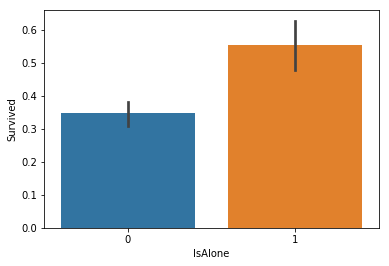

In [23]:
sns.barplot(x="IsAlone", y="Survived", data=train_data)


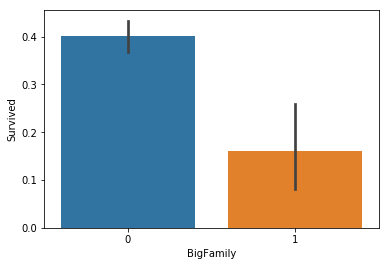

In [24]:
sns.barplot(x="BigFamily", y="Survived", data=train_data)

 The passengers who travelled alone  had higher survival chance than the passengers with family size of more than 3
 The passengers who had a family size of 3 had the more survival chance than the persons who travelled alone

Now the Features like 'Sibsp' and 'Parch' may be dropped as it wont be of any use in the future.

In [25]:
 train_data = train_data.drop(['Parch','SibSp'], axis=1)

In [26]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Title', 'AgeGroup', 'Familysize',
       'IsAlone', 'BigFamily'],
      dtype='object')

In [27]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked,Title
count,891,891,891,204,891,891
unique,891,2,681,147,3,6
top,"Mullens, Miss. Katherine ""Katie""",male,347082,C23 C25 C27,S,Mr
freq,1,577,7,4,646,517


#### Dropping the columns which are no longer relevant for analysis.
<list>
1. Ticket feature may be dropped  as it contains high ratio of duplicates and there may not be a correlation between Ticket and survival.
2. Cabin feature may be dropped as it is highly incomplete (has 0nly 147 unique values) and contains 687 null values.So its difficult to fill in the null values.
3. PassengerId may be dropped from training dataset as it does not contribute to survival.



  

In [28]:
 train_data = train_data.drop(['Ticket', 'Cabin','PassengerId'], axis=1)

In [29]:
train_data.columns
#train_data.shape

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Fare', 'Embarked', 'Title',
       'AgeGroup', 'Familysize', 'IsAlone', 'BigFamily'],
      dtype='object')

Since we have created new feature called 'Age group', 'Age' surves no importance in the analysis. so it is droppeb

In [32]:
train_data = train_data.drop(['Age'], axis=1)
train_data.head(5)

,Survived,Pclass,Name,Sex,Fare,Embarked,Title,AgeGroup,Familysize,IsAlone,BigFamily
0,0,3,"Braund, Mr. Owen Harris",male,7.2500,S,Mr,teenager,1,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,71.2833,C,Mrs,teenager,1,1,0
2,1,3,"Heikkinen, Miss. Laina",female,7.9250,S,Miss,teenager,0,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,53.1000,S,Mrs,teenager,1,1,0
4,0,3,"Allen, Mr. William Henry",male,8.0500,S,Mr,teenager,0,0,0
